## Project specification

The assignment consists of two parts, each one worth 50% of the total weight associated with the assignment.

- **First part of the project**

Implement the k-means algorithm using the Mahalanobis distance instead of the standard Euclidean distance. Then, create a toy dataset with 2 or 3 dimensions (so it is possible to easily visualize the data) with roughly 500 data points. Such a dataset should be designed so that it allows you to show how and when k-means operating with the Mahalanobis distance works better than k-means equipped with the Euclidean distance and a centroid-based cluster representative.
    
- **Second part of the project**

Implement the Davies-Bouldin index for cluster validation (intrinsic cluster validation). Then, perform model selection for finding the best partition order *k* of k-means. For this part of the project, use the standard k-means implementation operating with the Euclidean distance and centroids as cluster representatives. Perform simulations and comments on the results obtained on the dataset named "cluster_validation_data.txt" that has been provided with this notebook.

## Your project starts from here

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

### Part 1 of the project...

#### Kmeans clustering algorithm with mahalnobis distance.

#### Goal of the Algorithm:
    Cluster a data set into K different clusters

#### The Algorithm is as Described:
    initialize cluster centers (centriods) at random
       loop until centers-1 == centers (_note: centers == centriods)_(converged):
         update cluster labels -> assign points to nearest cluster (centroid)
         update cluster centers -> set new centers (mean for each cluster)
       return clusters
       
#### Implementation:
    * to implement this algorithm, for simplicity, I will initially use the euclidean distance to measure the distance between a point and a centriod.
    
    * the difference between a kmeans implementation using euclidean distance and mahalobis distance will be highlighted with the use of a toy data set that consists of clusters in an ellipsoid. however, since this is my first time implementing this algorithm, I will start with a simpler repersentation.
    
    * The data sets will be created using ski-kit learn, similar to the posted example.


##### Euclidean distance function
    * the distance between two points can me described as follows:
        * distance(x1,x2) = square_root((x1-x2)^2)
        
##### mahalanobis distance function:
    * matrix multiplication
    * since we only have two data points (x,y) we don't need the diagonal of the resulting matrix.
    * formula = sqrt( (x-mean) * inv_cov(x-mean) )

In [2]:
def euclidean_distance(x1,x2):
    distance = np.sqrt(np.sum((x2-x1)**2))
    return distance

def m_distance(x1, x2, data):
    #point - mean
    x = x1 - x2
    data = np.transpose(data)
    #grab inverse cov of data
    data = np.cov(data)
    data = np.linalg.inv(data)
    #multiply
    temp = np.dot(x,data)
    mahal = np.dot(temp,x)
    
    return np.sqrt(mahal)

#### Kmeans implementation
    * we will implement a class to initialize data relating to the algorithm
    * we will manually input the amount of clusters we wish to find, for simplicity.
    * we have a flag if we want to use either distance
    

In [3]:
class Kmeans:
    def __init__(self, K):
        self.K = K
        self.dist = False
        self.clusters = [[] for i in range(K)] #using this will produce K empty lists to store points inside
        self.centriods = [] #this will store the centriods for each cluster (size should be equal to K)
        
    def predict(self, X,mDistance):
        #store the recieved data
        self.dist = mDistance
        self.X = X
        self.samples, self.features = X.shape
        
        #initialize means by picking random points
        rand = np.random.choice(self.samples,self.K, replace = False) #this np method picks random samples 
                                                                      #by returning K indices in the dataset
        for i in rand:
            self.centriods.append(X[i]) #append random data points as initial centriods.
            
        #optimization
        # first, we want to set a maximum iteration amount for the optimization
        for j in range(150): #150 for now
            #create clusters
            self.clusters = self.create_new_clusters()
            #self.plot() #plot for debugging
            
            #update centriods
            old = self.centriods
            self.centriods = self.get_centriods()
            
            
            #check if converged
            if self.converged(old, self.centriods):
                break #break the loop if we are converged
                
            #since we mapped ids, we have to extract the clusters before returning them.
            clusters = [[] for i in range(self.K)]
            for i,clust in enumerate(self.clusters):
                for j in clust:
                    clusters[i].append(X[j])

            clusters = np.asarray(clusters)
                
        return clusters
            
    #this creates clusters from the data set from centriods
    def create_new_clusters(self):
        temp = [[] for i in range(self.K)] #make a temporary new cluster list
        for i, sample in enumerate(self.X): #for each point in the sample, return the point and the index.
            #find closest centriod and assign it to a cluster
            #calculate distances between each centriod and pint
            distances = []
            for p, centriod in enumerate(self.centriods):
                if self.dist:
                    distances.append(m_distance(sample,centriod,self.X))
                else:
                    distances.append(euclidean_distance(sample,centriod))
            closest = np.argmin(distances)
            
            
            #this essentailly maps the ids to clusters
            temp[closest].append(i)  
        
        return temp
    
    #this makes a new centriod list and calculates new centriods
    def get_centriods(self):
        temp = np.zeros((self.K,self.features))
        for i, cluster in enumerate(self.clusters):
            mean = np.mean(self.X[cluster],axis = 0)
            temp[i] = mean
        return temp
    
    #this checks if the clusters have converged (no change in centriods)
    def converged(self, old, new):
        distances = []
        for i in range(self.K):
            if self.dist:
                distances.append(m_distance(old[i],new[i],self.X))
            else:
                distances.append(euclidean_distance(old[i],new[i]))
            
        return sum(distances) == 0
        
                
   #plots the current data with clusters
    def plot(self):
        fig, ax = plt.subplots(figsize=(12,8))
        
        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)
            
        for i in self.centriods:
            ax.scatter(*i, marker = "X", color  = "black", linewidth = 4 )
        
        plt.show()
        


Here is a test run with a toy data set using __Mahalanobis distance__ _note: this may take a minute due to matrix multiplcations_

C:\Users\Legol\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\numpy\core\_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


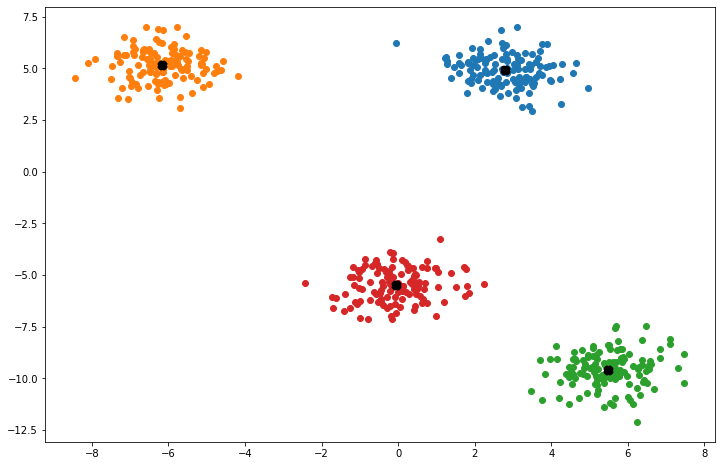

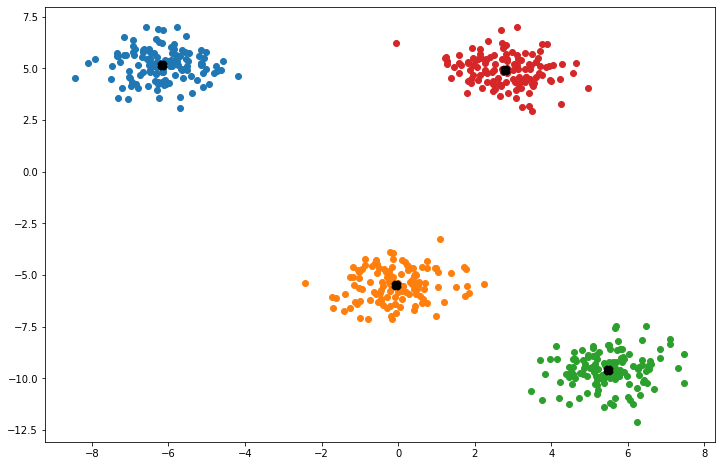

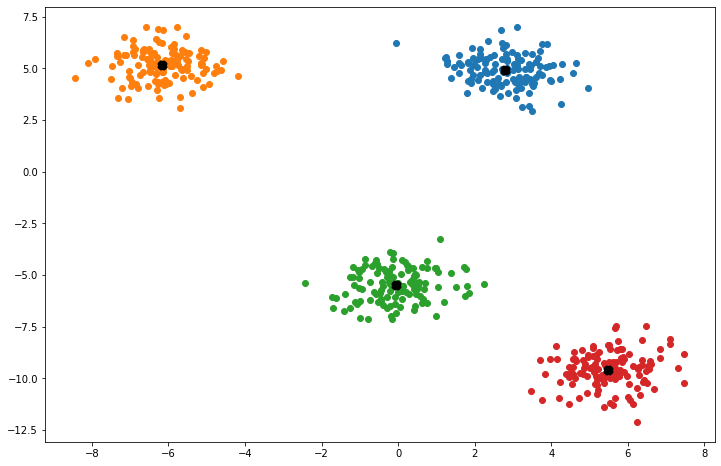

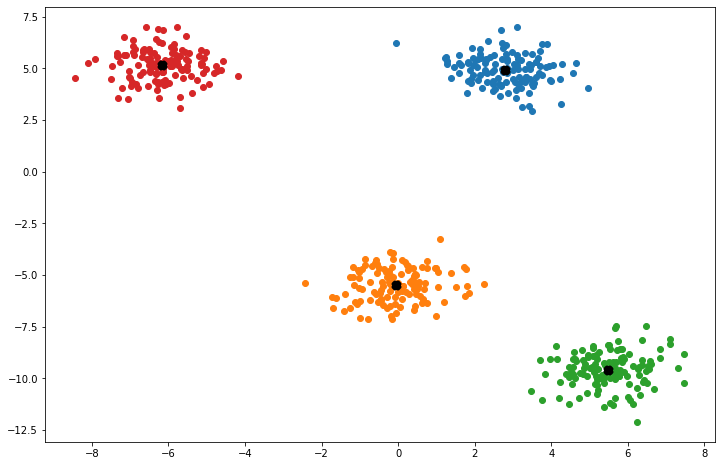

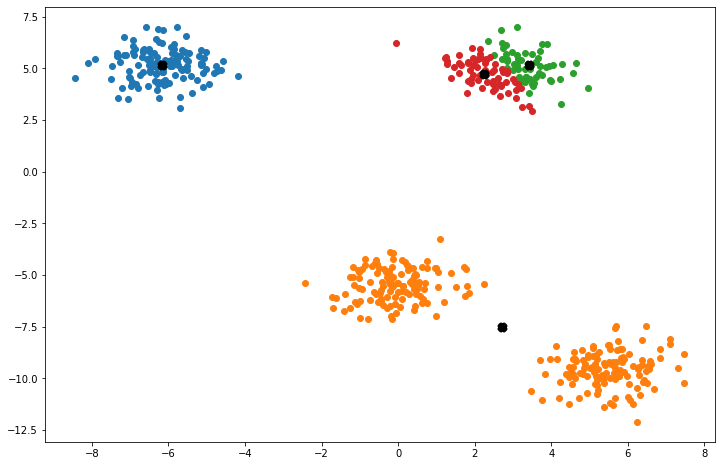

In [4]:
x,y = make_blobs(centers = 4, cluster_std=0.85, n_samples = 500, n_features = 2, shuffle = True, random_state = 10)


k1 = Kmeans(4)
k2 = Kmeans(4)
k3 = Kmeans(4)
k4 = Kmeans(4)
k5 = Kmeans(4)

pred1 = k1.predict(x,True)
pred2 = k2.predict(x,True)
pred3 = k3.predict(x,True)
pred4 = k4.predict(x,True)
pred5 = k5.predict(x,True)

k1.plot()
k2.plot()
k3.plot()
k4.plot()
k5.plot()


here is a test run with the same data, but calculating __Euclidean distance__

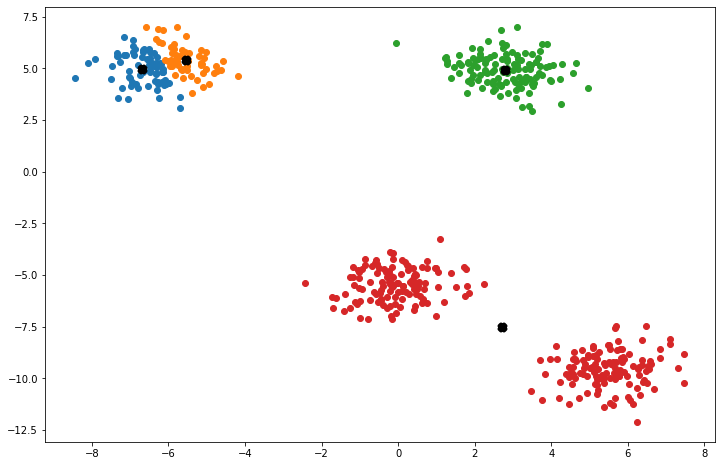

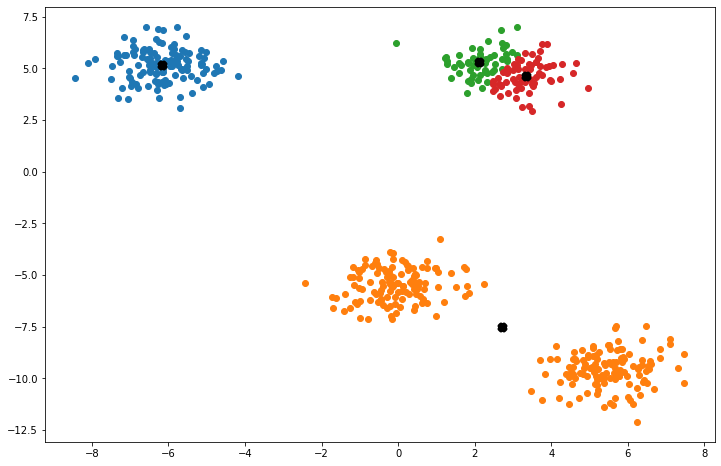

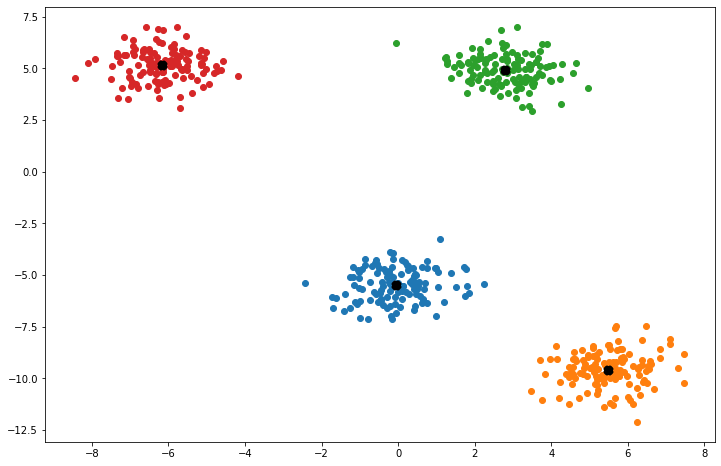

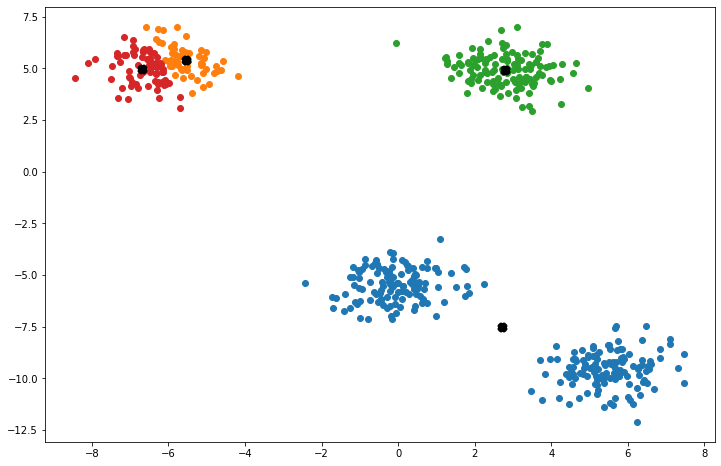

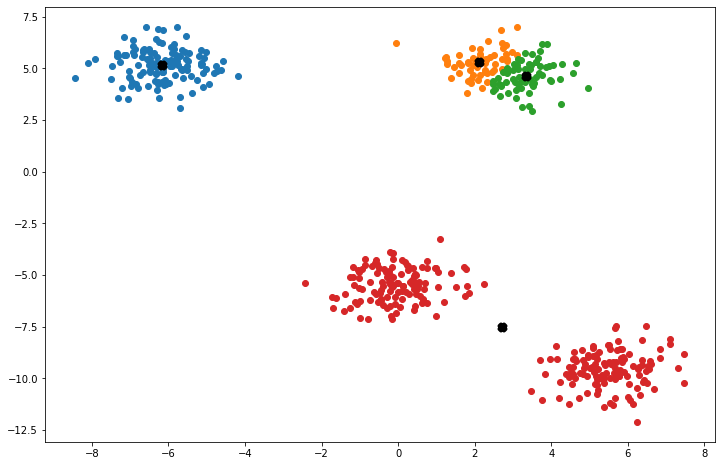

In [5]:
k1 = Kmeans(4)
k2 = Kmeans(4)
k3 = Kmeans(4)
k4 = Kmeans(4)
k5 = Kmeans(4)

pred1 = k1.predict(x,False)
pred2 = k2.predict(x,False)
pred3 = k3.predict(x,False)
pred4 = k4.predict(x,False)
pred5 = k5.predict(x,False)

k1.plot()
k2.plot()
k3.plot()
k4.plot()
k5.plot()

as you can see, using mahalanobis distance yields more consistent results.

note: multiple test runs required since we are using random initialization.

### Part 2 of the project...

### Davies-Bouldin index

Goal: find the minimum Davies-bouldin index
This tells us how many clusters we should be creating for a given distribution

algorithm:

for a given partition (prediction from the algorithm above):

    for each cluster i in partition:
    
        for each cluster j != i in partition:
        
            calculate distance between every point in i
            calculate distance between every point in j
            
            x1 = sum distances in i, divide by size of i
            x2 = sum distances in j, divide by size of j
            
            x3 = x1+x2/euclidean_distance(centriod i, centriod j)
            
            append x3 to list l1

        choose max in list l1 append to list l2
        
return average(l2)
            
        

##### lets start with creating a valid distribution from the file and a test to see if it works.

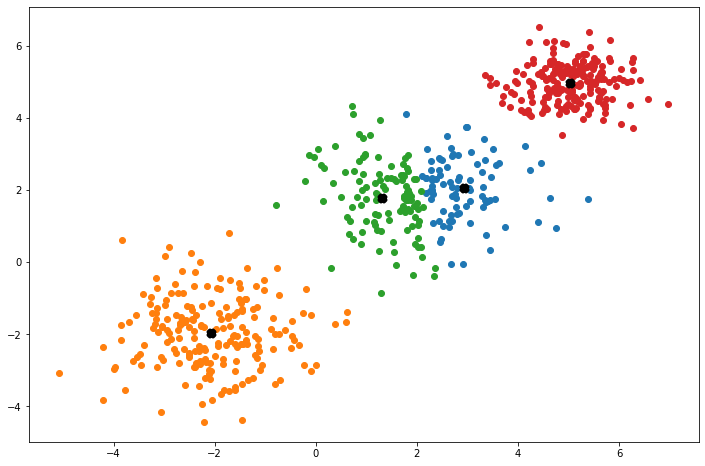

In [6]:
f = open("cluster_validation_data.txt")

l = []
for line in f:
    values = line[:-1].split(",")
    temp = [float(values[0]),float(values[1])]
    l.append(temp)
    
l = np.asarray(l)

K = Kmeans(4)
p = K.predict(l,False)



K.plot()


Everything works... 

time to define the algorithm

In [7]:

#this calculates the average distance between every point in a given cluster
def avg_dist(cluster):
    distance = []
    avg_list = []
    for i in cluster:
        for j in cluster:
            if i is not j:
                distance.append(euclidean_distance(i,j))
        avg_list.append(np.mean(distance))

                

    avg = np.mean(avg_list)
    
    return avg

#this returns the centriod of a given cluster
def get_centriod(cluster):
    mean = np.mean(cluster,axis = 0)
    return mean


#this returns BDI for a given partition
#this is exactly as described in the psuedo code above.
def bd_index(partition):
    max_list = []
    
    for i in partition:
        avg_list = []
        for j in partition:
            if i is not None and j is not None:
                if i is not j:
                    d1 = avg_dist(i)
                    d2 = avg_dist(j)

                    c1 = get_centriod(i)
                    c2 = get_centriod(j)

                    avg_list.append((d1 + d2) / euclidean_distance(c1,c2))
                
        max_list.append(max(avg_list))
        
           
    avg_max = np.mean(max_list)
    

    
    return avg_max
                
    

__now to test the algorithm... lets just print the previous Kmeans prediction on the data set__

In [8]:
idx = bd_index(p)

print(idx)

1.164465477668217


nice! we get a number... just kidding.. this is the BDI for partition lets test out some values (__this may take awhile..__)

In [9]:

K1 = Kmeans(2)
K2 = Kmeans(3)
K3 = Kmeans(4)
K4 = Kmeans(5)


p1 = K1.predict(l,False)
p2 = K2.predict(l,False)
p3 = K3.predict(l,False)
p4 = K4.predict(l,False)

id1 = bd_index(p1)
id2 = bd_index(p2)
id3 = bd_index(p3)
id4 = bd_index(p4)


print(id1)
print(id2)
print(id3)
print(id4)



0.6654924273038841
0.6487377044436242
1.2663937710454347
1.0648138899692285


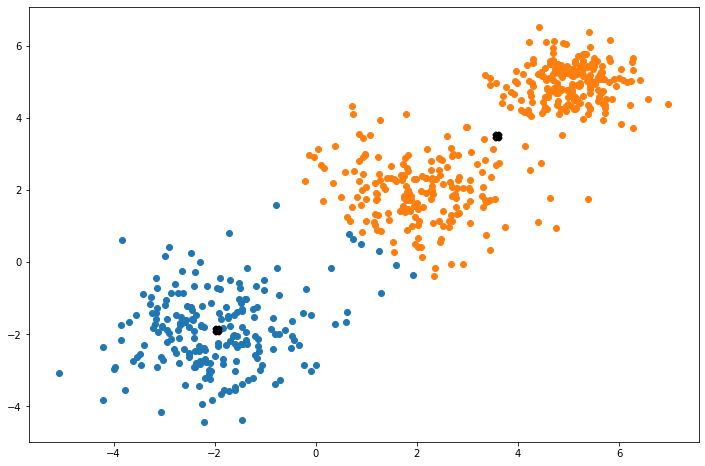

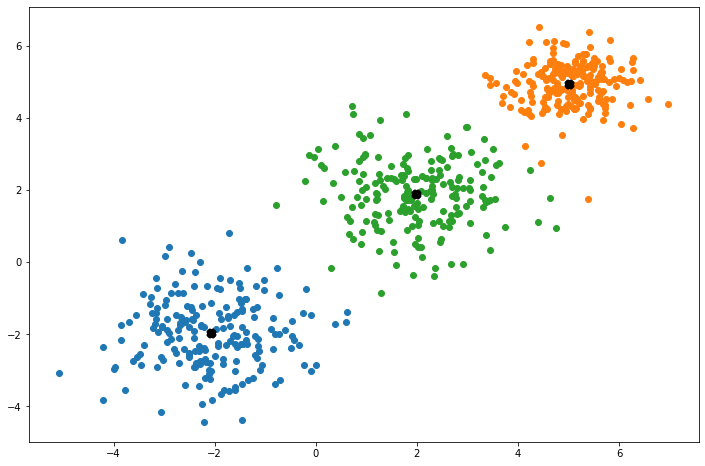

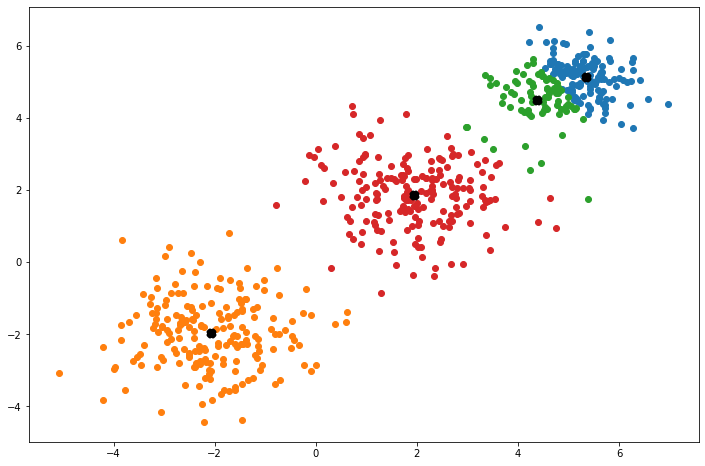

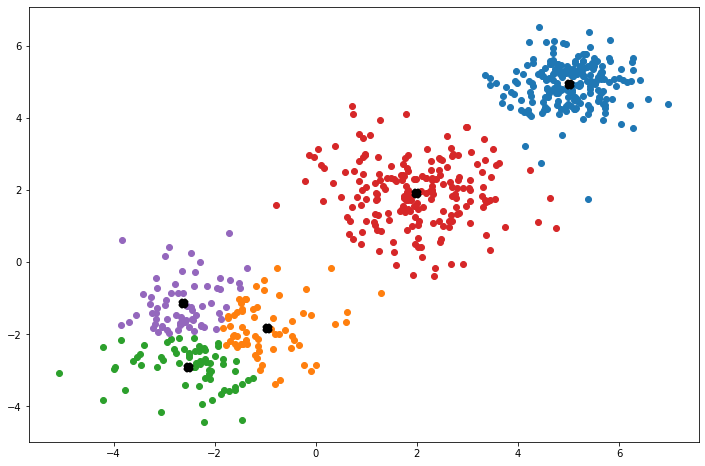

In [10]:
K1.plot()
K2.plot()
K3.plot()
K4.plot()

as we can see, using 3 clusters to group this dataset yields the best results. now, lets write this in code so we don't have to manually test for the best amount of clusters.

this algorithm essentailly does what I did in the previous step automatically, however, if in any iteration we get a BDI> 1, then we should break out, as it indicates too many clusters.



In [11]:
def optimal_K(data):
    
    min = None
    num_clusters = None
    for i in range(2,10):
        km = Kmeans(i)
        part = km.predict(data,False)
        idx = bd_index(part)
        if min is None:
            min = idx
            num_clusters = i
            #print(i)
        elif idx<min:
            min = idx
            num_clusters = i
        #if BDI > 1, there are too many clusters
        if idx>1:
            break
        
    
    return num_clusters
     
optimal = optimal_K(l)
print(optimal)



3


Beautiful. Now lets test our result one more time just to be sure that this is the optimal cluster amount

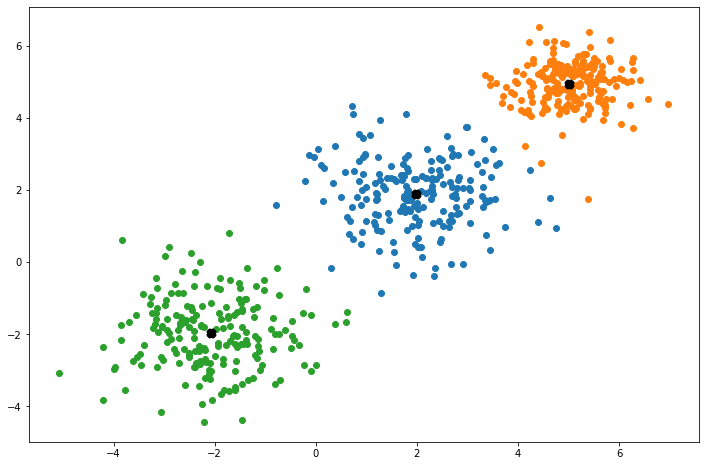

In [12]:
km = Kmeans(optimal)
km.predict(l,False)
km.plot()